#A - Molecular representations


In [42]:
Aspirin_smi=""
print(Aspirin_smi)
type(Aspirin_smi)

str

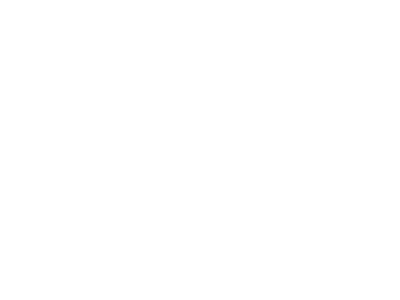

In [43]:
# if using Google Colab, rdkit needs to be installed
import sys
if 'google.colab' in sys.modules:
    !pip install rdkit

# The "basic" chemical functionalities are available in the rdkit.Chem module, with the others in the
# rdkit.Chem.AllChem module.
# Importing AllChem as Chem makes it less confusing.
# See the "getting started" page for more information.
from rdkit.Chem import AllChem as Chem
# Draw and IPythonConsole are needed to display molecules.
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

# Create Mol object from SMILES.
Aspirin = Chem.MolFromSmiles(Aspirin_smi)
display(Aspirin)

In [44]:
type(Aspirin)

rdkit.Chem.rdchem.Mol

In [45]:
false_smi = "CC(=O)OC1=CC=CC=C1C(0-)O"
false_Aspirin = Chem.MolFromSmiles(false_smi)
display(false_Aspirin)

[14:44:00] SMILES Parse Error: syntax error while parsing: CC(=O)OC1=CC=CC=C1C(0-)O
[14:44:00] SMILES Parse Error: check for mistakes around position 21:
[14:44:00] CC(=O)OC1=CC=CC=C1C(0-)O
[14:44:00] ~~~~~~~~~~~~~~~~~~~~^
[14:44:00] SMILES Parse Error: Failed parsing SMILES 'CC(=O)OC1=CC=CC=C1C(0-)O' for input: 'CC(=O)OC1=CC=CC=C1C(0-)O'


None

In [46]:
type(false_Aspirin)

NoneType

In [47]:
Chem.MolToSmiles(Aspirin)

''

#B - Accessing basic molecular properties


In [48]:
Aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"  # Aspirin in SMILES format
Aspirin = Chem.MolFromSmiles(Aspirin_smiles)
num_atoms = Aspirin.GetNumAtoms()
print("Number of atoms:", num_atoms)

Number of atoms: 13


In [49]:
for atom in Aspirin.GetAtoms():
    print(f"Atom: {atom.GetSymbol()}, Atomic Number: {atom.GetAtomicNum()}")

Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: O, Atomic Number: 8
Atom: O, Atomic Number: 8
Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: C, Atomic Number: 6
Atom: O, Atomic Number: 8
Atom: O, Atomic Number: 8


In [50]:
for atom in Aspirin.GetAtoms():
    print(f"Atom:{atom.GetIdx()} ({atom.GetSymbol()}), Formal charge: {atom.GetFormalCharge()}")

Atom:0 (C), Formal charge: 0
Atom:1 (C), Formal charge: 0
Atom:2 (O), Formal charge: 0
Atom:3 (O), Formal charge: 0
Atom:4 (C), Formal charge: 0
Atom:5 (C), Formal charge: 0
Atom:6 (C), Formal charge: 0
Atom:7 (C), Formal charge: 0
Atom:8 (C), Formal charge: 0
Atom:9 (C), Formal charge: 0
Atom:10 (C), Formal charge: 0
Atom:11 (O), Formal charge: 0
Atom:12 (O), Formal charge: 0


In [51]:
for atom in Aspirin.GetAtoms():
    print(f"Atom:{atom.GetIdx()} ({atom.GetSymbol()}), Hybridization: {atom.GetHybridization()}")

Atom:0 (C), Hybridization: SP3
Atom:1 (C), Hybridization: SP2
Atom:2 (O), Hybridization: SP2
Atom:3 (O), Hybridization: SP2
Atom:4 (C), Hybridization: SP2
Atom:5 (C), Hybridization: SP2
Atom:6 (C), Hybridization: SP2
Atom:7 (C), Hybridization: SP2
Atom:8 (C), Hybridization: SP2
Atom:9 (C), Hybridization: SP2
Atom:10 (C), Hybridization: SP2
Atom:11 (O), Hybridization: SP2
Atom:12 (O), Hybridization: SP2


In [52]:
atom_idx = 1
atom = Aspirin.GetAtomWithIdx(atom_idx)
neigbors = [n.GetIdx() for n in atom.GetNeighbors()]
print(f"Atom {atom_idx} has neighbors: {neigbors}")

Atom 1 has neighbors: [0, 2, 3]


In [53]:
for atom in Aspirin.GetAtoms():
    print(f"Atom {atom.GetIdx()} ({atom.GetSymbol()}): {atom.GetNumImplicitHs()} implicit H's")

Atom 0 (C): 3 implicit H's
Atom 1 (C): 0 implicit H's
Atom 2 (O): 0 implicit H's
Atom 3 (O): 0 implicit H's
Atom 4 (C): 0 implicit H's
Atom 5 (C): 1 implicit H's
Atom 6 (C): 1 implicit H's
Atom 7 (C): 1 implicit H's
Atom 8 (C): 1 implicit H's
Atom 9 (C): 0 implicit H's
Atom 10 (C): 0 implicit H's
Atom 11 (O): 0 implicit H's
Atom 12 (O): 1 implicit H's


In [54]:
num_atoms_ori= Aspirin.GetNumAtoms()
Aspirin_explicitH = Chem.AddHs(Aspirin)
num_atom = Aspirin_explicitH.GetNumAtoms()
num_heavy = Aspirin_explicitH.GetNumHeavyAtoms()
print(f"The original Mol atoms has {num_atoms_ori} atoms, \nAspirin consists {num_atom} with {num_heavy} heavy atoms")

The original Mol atoms has 13 atoms, 
Aspirin consists 21 with 13 heavy atoms


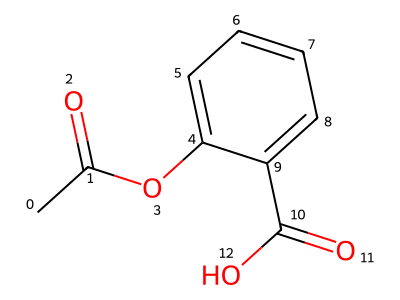

In [55]:
# Set up the display format to visualize atom indices.
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addBondIndices = False
IPythonConsole.molSize = (400, 300)

# For chiral molecules, drawOptions().addStereoAnnotation can also be relevant.
# IPythonConsole.drawOptions.addStereoAnnotation = True

Aspirin

In [56]:
pick_atom = 6
atom_element = Aspirin.GetAtomWithIdx(pick_atom).GetSymbol() # execute the function to get element
atom_charge = Aspirin.GetAtomWithIdx(pick_atom).GetFormalCharge() # execute the function to get charge
atom_hybridization = Aspirin.GetAtomWithIdx(pick_atom).GetHybridization()
atom_neighbors = [n.GetIdx() for n in Aspirin.GetAtomWithIdx(pick_atom).GetNeighbors()]
atom_nImplH = Aspirin.GetAtomWithIdx(pick_atom).GetNumImplicitHs() # get implicit H

print(f"Atom {pick_atom} is of the element {atom_element}, has a formal charge of {atom_charge}, and a {atom_hybridization} hybridization.")
print(f"It is connected to atoms {', '.join(map(str,atom_neighbors))}, plus {atom_nImplH} implicit H.") # convert atom_neighbors to str for join

Atom 6 is of the element C, has a formal charge of 0, and a SP2 hybridization.
It is connected to atoms 5, 7, plus 1 implicit H.


CC(=N)Oc1ccccc1C(=O)O


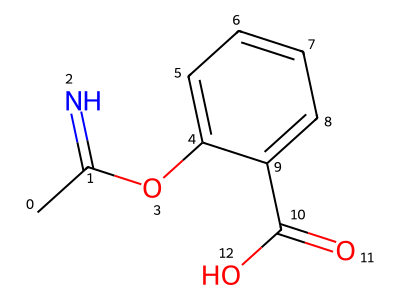

In [57]:
Aspirin.GetAtomWithIdx(2).SetAtomicNum(7)
print(Chem.MolToSmiles(Aspirin))
display(Aspirin)


CC(=O)Oc1ccccc1C(=O)O


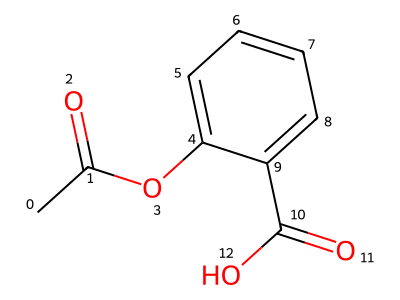

In [58]:
Aspirin.GetAtomWithIdx(2).SetAtomicNum(8)
print(Chem.MolToSmiles(Aspirin))
display(Aspirin)

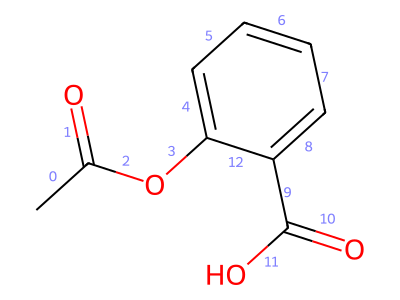

In [59]:
# change display format to show bond indices
IPythonConsole.drawOptions.addAtomIndices = False
IPythonConsole.drawOptions.addBondIndices = True

display(Aspirin)

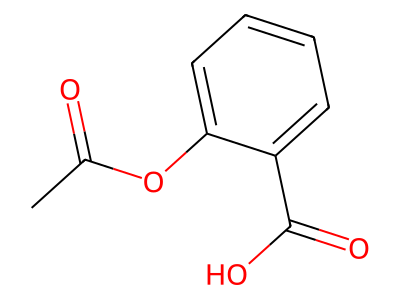

In [60]:
# after printing, reset display format to show structures only
IPythonConsole.drawOptions.addBondIndices = False
display(Aspirin)

In [61]:
pick_bond = 5
bond_type = Aspirin.GetBondWithIdx(pick_bond).GetBondType()
ring_size = 6
bond_is_in_ring = Aspirin.GetBondWithIdx(pick_bond).IsInRing()
print(f"True or False: bond {pick_bond} is in a {ring_size}-membered ring - {bond_is_in_ring}") # Changed bond_is_inRingSize to bond_is_in_ring

True or False: bond 5 is in a 6-membered ring - True


#C - Calculating molecular descriptors

In [62]:
from rdkit.Chem import Descriptors
Descriptors.MolLogP(Aspirin) # Changed Descriptor to Descriptors and MolLog to MolLogP

1.3101

In [63]:
desc_sel = ["MolLogP", "ExactMolWt", "NumHeteroatoms"]
for desc in desc_sel:
    print(desc, getattr(Descriptors, desc)(Aspirin))

MolLogP 1.3101
ExactMolWt 180.042258736
NumHeteroatoms 4


In [64]:
rdkit_desc= Descriptors.CalcMolDescriptors(Aspirin)
type(rdkit_desc)
print(rdkit_desc)

{'MaxAbsEStateIndex': np.float64(10.611948223733938), 'MaxEStateIndex': np.float64(10.611948223733938), 'MinAbsEStateIndex': np.float64(0.01601851851851821), 'MinEStateIndex': np.float64(-1.1140277777777776), 'qed': 0.5501217966938848, 'SPS': 9.307692307692308, 'MolWt': 180.15899999999996, 'HeavyAtomMolWt': 172.09499999999997, 'ExactMolWt': 180.042258736, 'NumValenceElectrons': 68, 'NumRadicalElectrons': 0, 'MaxPartialCharge': 0.33900378687731025, 'MinPartialCharge': -0.4775395271554559, 'MaxAbsPartialCharge': 0.4775395271554559, 'MinAbsPartialCharge': 0.33900378687731025, 'FpDensityMorgan1': 1.3076923076923077, 'FpDensityMorgan2': 1.9230769230769231, 'FpDensityMorgan3': 2.4615384615384617, 'BCUT2D_MWHI': 16.53611122125433, 'BCUT2D_MWLOW': 10.182282381035343, 'BCUT2D_CHGHI': 2.104306980957856, 'BCUT2D_CHGLO': -2.0311320919470135, 'BCUT2D_LOGPHI': 2.1698345568128055, 'BCUT2D_LOGPLOW': -2.063000061964296, 'BCUT2D_MRHI': 5.913065796110142, 'BCUT2D_MRLOW': -0.13141434244030561, 'AvgIpc': 2

In [65]:
print("The molecule Aspirin has:")
print(f" < {rdkit_desc['NumHDonors']} hydrogen bond donors")
print(f" < {rdkit_desc['NumHAcceptors']} hydrongen bond acceptors")
print(f" < {rdkit_desc['NumRotatableBonds']} rotatable bonds")
print(f" < a logP value of {rdkit_desc['MolLogP']:.2f}")
print(f" < a TPSA Value of {rdkit_desc['TPSA']:.2f}Å\u00b2") # Added a 2 to the format specifier and changed the unicode for Å squared
print(f" < {rdkit_desc['ExactMolWt']:.2f} molecular weight")

The molecule Aspirin has:
 < 1 hydrogen bond donors
 < 3 hydrongen bond acceptors
 < 2 rotatable bonds
 < a logP value of 1.31
 < a TPSA Value of 63.60Å²
 < 180.04 molecular weight


#Case study: drug-like molecules


In [66]:
smiles = [
    "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "C[C@@H](NC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1)C(=O)NO",
    "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3cc(C(F)(F)F)cc(C(F)(F)F)c3)cc2)ccn1",
    "N#Cc1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "CN(C)c1ccc(NC(=O)c2cc(Oc3ccc(NC(=O)Nc4ccc(Cl)c(C(F)(F)F)c4)cc3)ccn2)cc1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Br)c(C(F)(F)F)c3)cc2)ccn1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(OC(F)(F)F)cc3)cc2)ccn1",
    "CCNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1",
    "CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3cccc(C(F)(F)F)c3)cc2)ccn1"
]

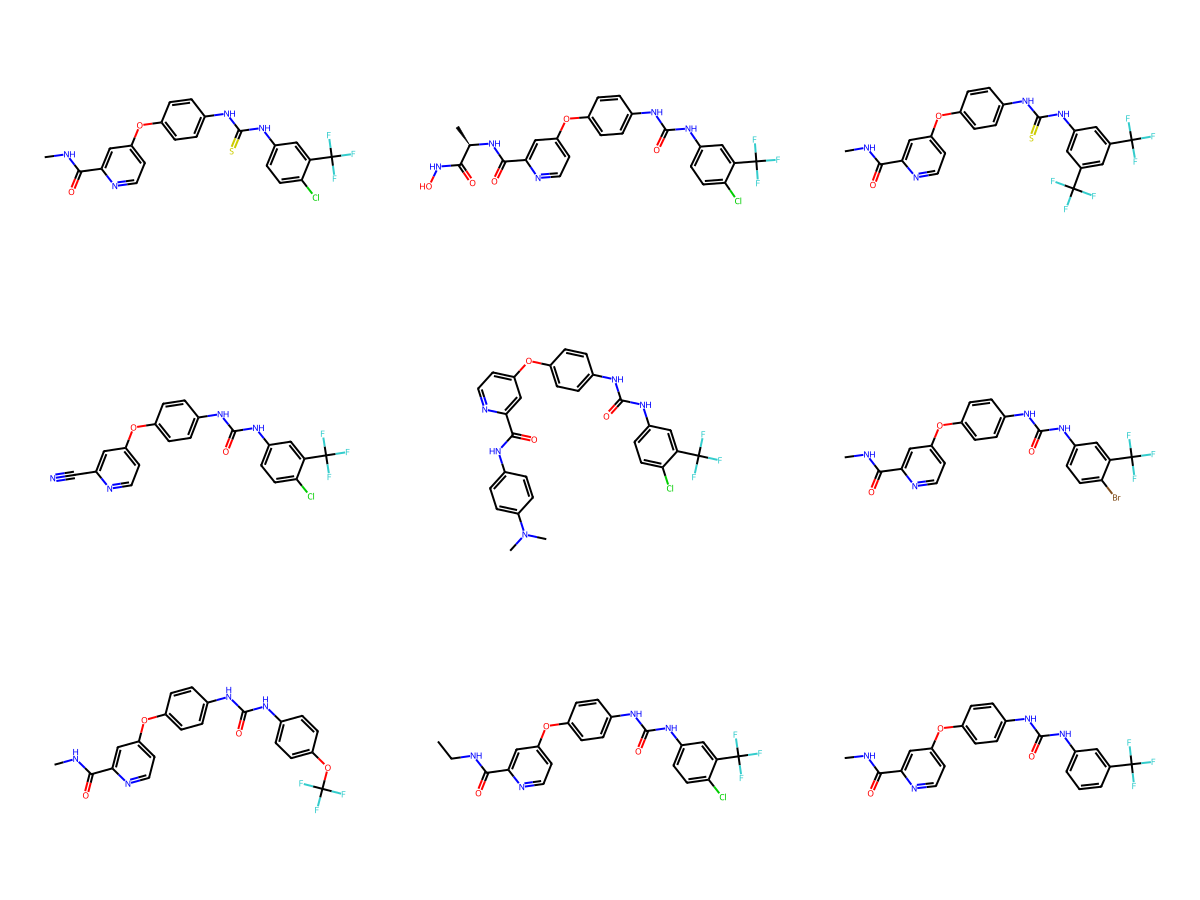

In [67]:
# create a mol object for each entry in the list with a for loop
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
# MolsToGridImage(list_of_mol_obj) creates a collage displaying all structures from the list of mols
Draw.MolsToGridImage(mols,subImgSize=(400, 300))

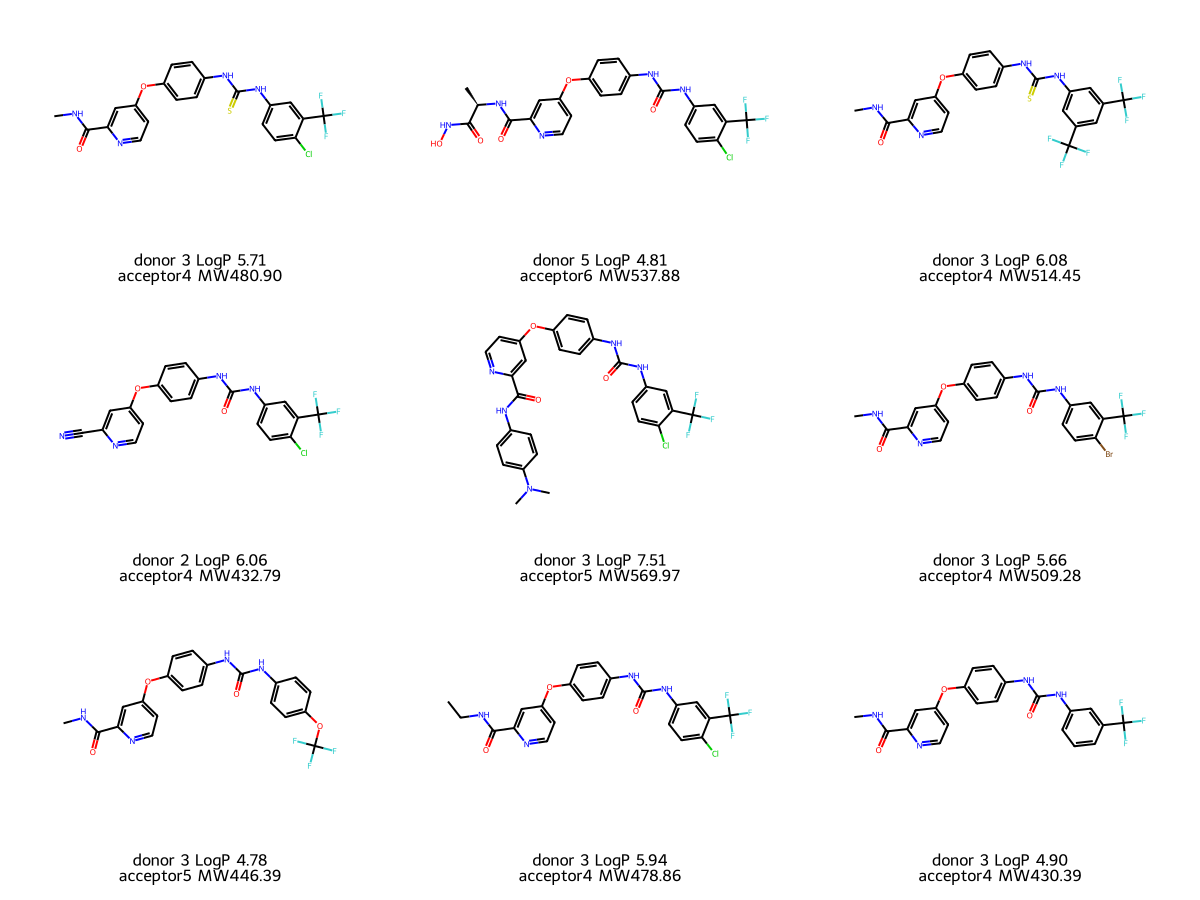

In [68]:
mols_nHD = [Descriptors.NumHDonors(mol) for mol in mols]
mols_nHA = [Descriptors.NumHAcceptors(mol) for mol in mols]
mols_logP = [Descriptors.MolLogP(mol) for mol in mols]
# Calculate the molecular weights and store them in mols_MW
mols_MW = [Descriptors.MolWt(mol) for mol in mols]
# Removed the comma from the format specifier
lbl_nHbondDA = [f"donor {mols_nHD[i]} LogP {mols_logP[i]:.2f}\nacceptor{mols_nHA[i]} MW{mols_MW[i]:.2f}" for i in range(len(mols))]

# .legendFraction determines the amount of space the labels are allowed to fill, and consequently the font sizes
IPythonConsole.drawOptions.legendFraction = 0.3

# use the list of labels as "legends" and display the outcome
Draw.MolsToGridImage(mols, legends = lbl_nHbondDA,subImgSize = (400,300))

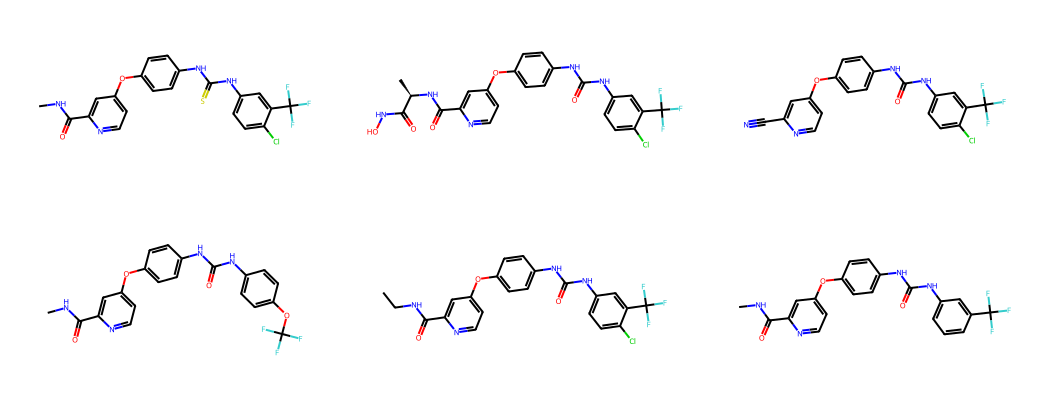

In [69]:
import numpy as np
Sorafenib_morphs_dic = {
    "SMILES" : smiles,
    "mol_obj": mols,
    "n_HBond_Donors": mols_nHD,
    "n_HBond_Acceptors": mols_nHA,
    "MW": mols_MW,
    "LogP": mols_logP

}

# Convert dictionary values to NumPy arrays outside the loop
for desc in Sorafenib_morphs_dic:
    Sorafenib_morphs_dic[desc] = np.array(Sorafenib_morphs_dic[desc])

# Perform filtering outside the loop using the converted NumPy arrays
is_RO5_druglike_strict = (Sorafenib_morphs_dic["n_HBond_Donors"] <= 5) & \
(Sorafenib_morphs_dic["n_HBond_Acceptors"] <= 10) & \
(Sorafenib_morphs_dic["MW"] <= 500) & \
(Sorafenib_morphs_dic["LogP"] < 5.0)

is_RO5_druglike_lax = (Sorafenib_morphs_dic["n_HBond_Donors"] <= 5) & \
(Sorafenib_morphs_dic["n_HBond_Acceptors"] <= 10) & \
((Sorafenib_morphs_dic["MW"] <= 500) | (Sorafenib_morphs_dic["LogP"] < 5.0))

mols_RO5_druglike = Sorafenib_morphs_dic["mol_obj"][is_RO5_druglike_lax]
Draw.MolsToGridImage(mols_RO5_druglike, subImgSize=(350, 200))

#D - Fingerprints & Similarity Search


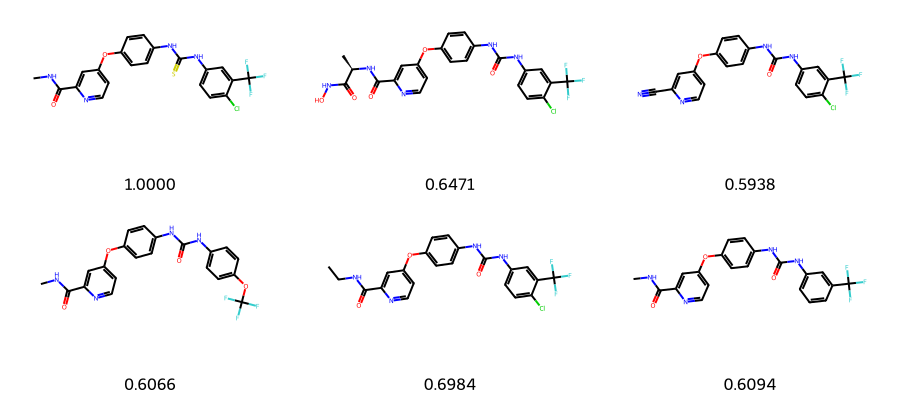

In [73]:
from rdkit import DataStructs
from rdkit.Chem import rdFingerprintGenerator

# Define sorafenib molecule from its SMILES string
sorafenib_smiles = "CNC(=O)c1cc(Oc2ccc(NC(=S)Nc3ccc(Cl)c(C(F)(F)F)c3)cc2)ccn1"
sorafenib = Chem.MolFromSmiles(sorafenib_smiles)

fpgen_morgan2 = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)
fp_sorafenib = fpgen_morgan2.GetFingerprint(sorafenib)

fp_mols = [fpgen_morgan2.GetFingerprint(mol) for mol in mols_RO5_druglike]
sorafenib_similarity = [DataStructs.TanimotoSimilarity(fp_sorafenib,fp_mol) for fp_mol in fp_mols]
Draw.MolsToGridImage(mols_RO5_druglike, legends=[f"{dist:.4f}" for dist in sorafenib_similarity], subImgSize=(300, 200))